<a href="https://colab.research.google.com/github/devlai23/MusicVision/blob/master/music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install anvil.uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server
anvil.server.connect("XXZ2FXE766LCYN4IFEOKZN5A-WJ3GZS5CJOP55SZU")

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
import fastai as fa
from fastai.vision import *

In [ ]:
import os
from pathlib import *
import pandas as pd

In [ ]:
INPUT = Path("Kaggle")
os.listdir(INPUT)

['data2.csv', 'data1.csv']

In [ ]:
test_df = pd.read_csv(INPUT/"data1.csv")
test_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [ ]:
train_df = pd.read_csv(INPUT/"data2.csv")
train_df.head(3)

,label,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Eight,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,Eight,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,Eight,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [ ]:
TRAIN = Path("train")
TEST = Path("test")

In [ ]:
try:
    os.makedirs(TEST)
except:
    pass

In [ ]:
import numpy as np

from PIL import Image

def save(note, filepath):
    note = note.reshape(64,64)
    note = note.astype(np.uint8)

    img = Image.fromarray(note)
    img.save(filepath)

In [ ]:
# save testing images
for index, note in test_df.iterrows():

    folder = TEST
    filename = f"{index}.jpg"
    filepath = folder/filename
    
    note = note.values
    
    save(note, filepath)

In [ ]:
# save training images
for index, row in train_df.iterrows():
      label,note = row[0], row[1:]
      
      folder = TRAIN/str(label)
      filename = f"{index}.jpg"
      filepath = folder/filename
      
      note = note.values
      
      save(note, filepath)

In [ ]:
tfms = fa.vision.get_transforms(do_flip=False)

In [ ]:
print('test:',TEST)
print('train:', TRAIN)
print(type(TEST))

test: test
train: train
<class 'pathlib.PosixPath'>


In [ ]:
data = fa.vision.ImageDataBunch.from_folder(
    path = ("train"),
    test = ("test"),
    valid_pct = 0.2,
    bs = 16,
    size = 28,
    #num_workers = 0,
    ds_tfms = tfms
)

In [ ]:
mnist_stats

([0.131], [0.308])

In [ ]:
data.normalize(mnist_stats)

ImageDataBunch;

Train: LabelList (1996 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
Whole,Whole,Whole,Whole,Whole
Path: train;

Valid: LabelList (498 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
Quarter,Whole,Half,Eight,Whole
Path: train;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: train

In [ ]:
print(data.classes)

['Eight', 'Half', 'Quarter', 'Sixteenth', 'Whole']


In [ ]:
learn = cnn_learner(data, base_arch=models.resnet18, metrics=accuracy, model_dir="/tmp/models", callback_fns=ShowGraph)

In [ ]:
# finding optimal learning rate, accuracy 90%+
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.63E-03
Min loss divided by 10: 3.98E-03


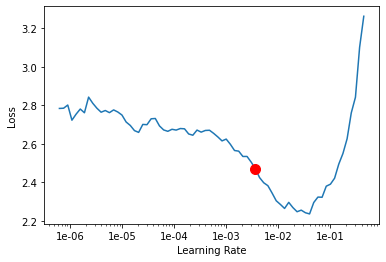

In [ ]:
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,1.499612,0.702247,0.755020,00:04
1,1.127235,0.491027,0.815261,00:04
2,0.856094,0.421434,0.845381,00:04
3,0.671798,0.308682,0.871486,00:04
4,0.662429,0.316635,0.885542,00:04
5,0.568699,0.191434,0.933735,00:04
6,0.475612,0.175359,0.941767,00:04


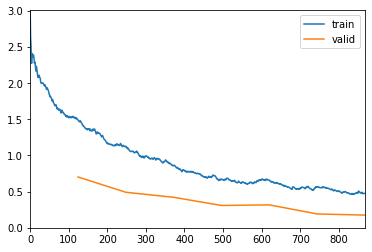

In [ ]:
learn.fit(7, 1e-3)

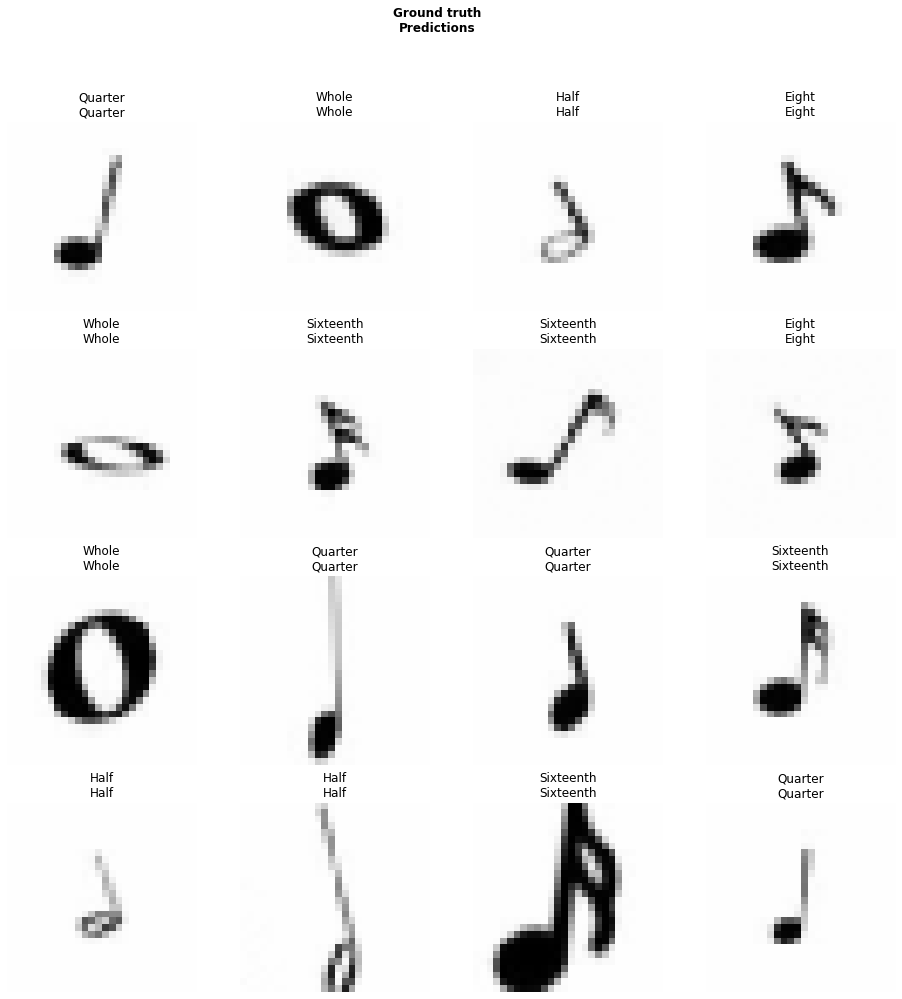

In [ ]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

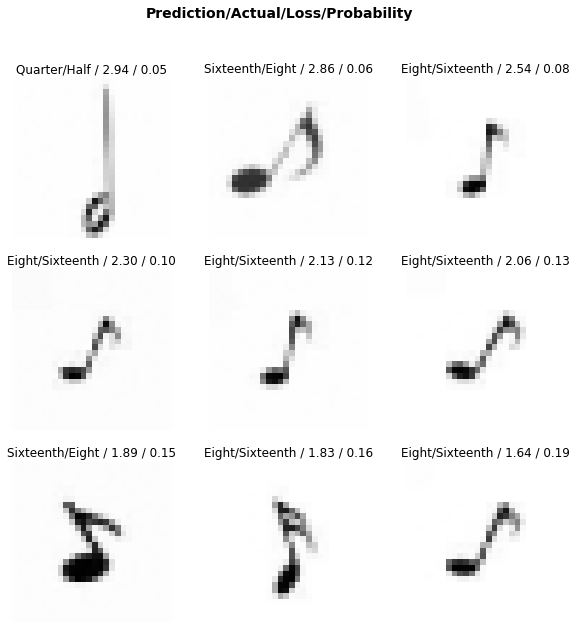

In [ ]:
interp.plot_top_losses(9, figsize=(10, 10))

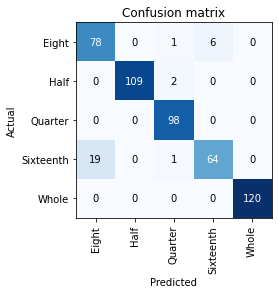

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
index = 4

In [ ]:
files = get_image_files("test")
open_image(files[index])
print(type(open_image(files[index])))

<class 'fastai.vision.image.Image'>


In [ ]:
learn.predict(open_image(files[index]))

(Category tensor(1),
 tensor(1),
 tensor([2.5678e-02, 9.7340e-01, 1.4941e-04, 4.8810e-04, 2.8756e-04]))

In [ ]:
if (learn.predict(open_image(files[index]))[1] == tensor(0)):
  print("Eighth")
elif (learn.predict(open_image(files[index]))[1] == tensor(1)):
  print("Half")
elif (learn.predict(open_image(files[index]))[1] == tensor(2)):
  print("Quarter")
elif (learn.predict(open_image(files[index]))[1] == tensor(3)):
  print("Sixteenth")
elif (learn.predict(open_image(files[index]))[1] == tensor(4)):
  print("Whole")

Half


In [ ]:
@anvil.server.callable
def predict(fileName):
  im = fa.vision.open_image("/content/drive/My Drive/notes/" + fileName)
  print(fileName)
  thing = (learn.predict(im)[1])
  print(thing)
  print(learn.predict(im))
  if (thing == tensor(0)):
    return "Eighth"
  if (thing == tensor(1)):
    return "Half"
  if (thing == tensor(2)):
    return "Quarter"
  if (thing == tensor(3)):
    return "Sixteenth"
  if (thing == tensor(4)):
    return "Whole"


anvil.server.wait_forever()

1278.jpg
tensor(4)
(Category tensor(4), tensor(4), tensor([2.9325e-06, 1.0025e-04, 1.6325e-03, 3.6836e-04, 9.9790e-01]))
1000.jpg
tensor(3)
(Category tensor(3), tensor(3), tensor([1.9356e-03, 7.0351e-08, 7.3144e-07, 9.9806e-01, 4.6750e-06]))
1278.jpg
tensor(4)
(Category tensor(4), tensor(4), tensor([2.9325e-06, 1.0025e-04, 1.6325e-03, 3.6836e-04, 9.9790e-01]))
1535.jpg
tensor(2)
(Category tensor(2), tensor(2), tensor([1.3738e-03, 2.4935e-03, 9.8995e-01, 3.2449e-04, 5.8565e-03]))
7470.jpg
tensor(4)
(Category tensor(4), tensor(4), tensor([2.6517e-22, 1.1565e-09, 2.3901e-05, 2.3410e-12, 9.9998e-01]))
7471.jpg
tensor(4)
(Category tensor(4), tensor(4), tensor([7.6472e-14, 1.2912e-05, 6.9477e-05, 6.1602e-11, 9.9992e-01]))
1000.jpg
tensor(3)
(Category tensor(3), tensor(3), tensor([1.9356e-03, 7.0351e-08, 7.3144e-07, 9.9806e-01, 4.6750e-06]))
7472.jpg
tensor(4)
(Category tensor(4), tensor(4), tensor([1.1073e-11, 3.6521e-02, 9.9704e-03, 2.5122e-08, 9.5351e-01]))
1535.jpg
tensor(2)
(Category ten

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
from PIL import Image

im = Image.open('/content/drive/My Drive/notes/1278.jpg')

